<a href="https://colab.research.google.com/github/sultanbst123/sentimen-analytics-submission-tahap-1-dicoding-/blob/main/Dicoding_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMPETITION SENTIMENT ANALYSIS
 
"Submission tahap 1 dicoding"
 
memprediksi racist / non-racist, data ini bersih dan tidak ada duplicate

# LIBRARY

In [ ]:
!pip install mplcyberpunk

In [ ]:
#basic library
import numpy as np
import pandas as pd
import re
 
#deep learning library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Embedding, Dense, Dropout, BatchNormalization, TimeDistributed,  Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
 
#visualization library
import mplcyberpunk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
 
#text preprocesing library
import nltk
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix
 
import warnings
warnings.filterwarnings("ignore")
plt.style.use("cyberpunk")

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

 
#FILE

In [ ]:


!pip install -U -q PyDrive 
 
  
 
from pydrive.auth import GoogleAuth 
 
from pydrive.drive import GoogleDrive 
 
from google.colab import auth 
 
from oauth2client.client import GoogleCredentials 
 
  
 
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
 
gauth = GoogleAuth() 
 
gauth.credentials = GoogleCredentials.get_application_default() 
 
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1Va04JmI_EmVDlO4U9a54rNEEi2AgLv4o/view?usp=drivesdk'
 
# to get the id part of the file 
 
id = link.split("/")[-2] 
  
 
downloaded = drive.CreateFile({'id':id})  
 
downloaded.GetContentFile('train_tweet.csv')   
 
train = pd.read_csv('train_tweet.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
 
link = 'https://drive.google.com/file/d/1VYRNsHrcNp4mq-dONWefxoxO9iHu7Wj7/view?usp=drivesdk'
 
# to get the id part of the file 
 
id = link.split("/")[-2] 
  
 
downloaded = drive.CreateFile({'id':id})  
 
downloaded.GetContentFile('test_tweet.csv')   
 
test = pd.read_csv('test_tweet.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [ ]:
 
link = 'https://drive.google.com/file/d/1VW6hTZVN2H2QwWHhKtDRACNMFtx5tJsT/view?usp=drivesdk'
 
# to get the id part of the file 
 
id = link.split("/")[-2] 
  
 
downloaded = drive.CreateFile({'id':id})  
 
downloaded.GetContentFile('sample_submission_tweet.csv')   
 
sub = pd.read_csv('sample_submission_tweet.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      17197 non-null  int64
 1   label   17197 non-null  int64
dtypes: int64(2)
memory usage: 268.8 KB


# EDA & TEXT CLEANING

In [ ]:
 
#check distribution data train dan test
train_dist = train["tweet"].str.len() 
test_dist = test["tweet"].str.len()

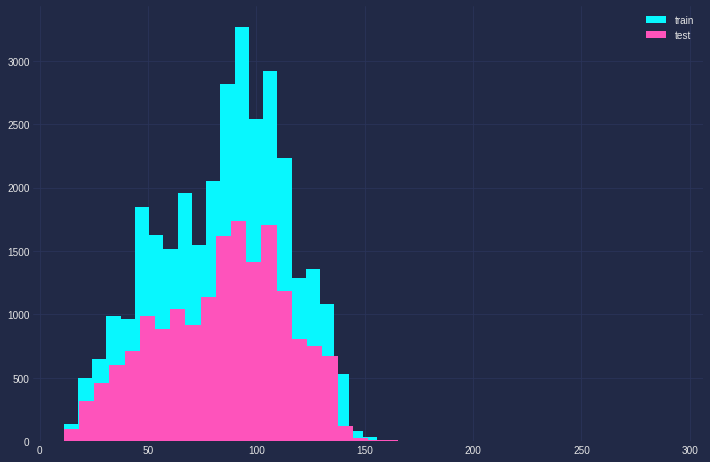

In [ ]:
plt.subplots(figsize=(12, 8))
plt.hist(train_dist,bins=40,label="train")
plt.hist(test_dist,bins=40,label="test")
plt.legend()

In [ ]:
train["tweet"].apply(lambda x:  len(x.split(" "))).sum()

512932

In [ ]:
train.sample(5)

,id,label,tweet
23288,23289,0,@user can't do this. not allowed to on run on ...
26485,26486,0,wtf is that shit about?
18199,18200,1,@user #school board seeks to oust member for ...
7974,7975,0,@user woke up before my alarm this morning! ...
10490,10491,0,#model i love u take with u all the time in ...


0    0.929854
1    0.070146
Name: label, dtype: float64


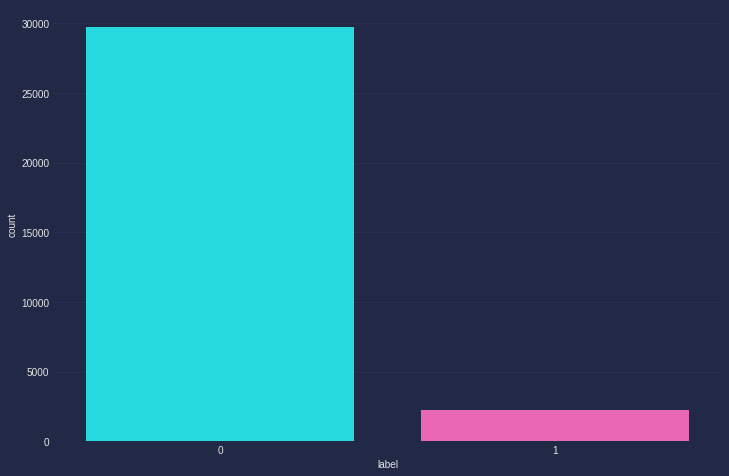

In [ ]:
# 1 rasis
# 0 tidak rasis
count = train.label.value_counts(normalize=True) 
print(count)
plt.subplots(figsize=(12,8)) 
sns.countplot(train["label"])

In [ ]:
#mengubah kata-kata singkat
def cont(tweet): 
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "we are", tweet)
    tweet = re.sub(r"That's", "that is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "what is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "there is", tweet)
    tweet = re.sub(r"He's", "he is", tweet)
    tweet = re.sub(r"It's", "it is", tweet)
    tweet = re.sub(r"You're", "you are", tweet)
    tweet = re.sub(r"I'M", "i am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "i am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "i am", tweet)
    tweet = re.sub(r"I'm", "i am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "i have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "we have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "you all", tweet)
    tweet = re.sub(r"Weren't", "were not", tweet)
    tweet = re.sub(r"Didn't", "did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "that is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "i would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "you are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "i will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "they are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "i would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "i have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "i will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "i would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "i have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "i will", tweet)
    tweet = re.sub(r"I'd", "i would", tweet)
    tweet = re.sub(r"Let's", "let us", tweet)
    tweet = re.sub(r"you'd", "you would", tweet)
    tweet = re.sub(r"It's", "it is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "have not", tweet)
    tweet = re.sub(r"Could've", "could have", tweet)
    tweet = re.sub(r"amp", "&", tweet)
    return tweet

In [ ]:
#menghapus semua simbol dan @user mention
def remove_punc(tweet): 
    tweet = re.sub(r"@[\w]*", " ",tweet)
    tweet = re.sub(r"[^a-zA-Z]"," ",tweet)
    return tweet

In [ ]:
#menghapus stopwords
def remove_stopwords(tweet):
    ts = tweet.split() 
    ts_without_sw = [word for word in ts if not word in stopwords.words("english")]
    tweet = " ".join([str(elem) for elem in ts_without_sw])
    return tweet

In [ ]:
#lemmatizer
def lemma(tweet):
    ts = tweet.split() 
    wnl = WordNetLemmatizer()
    tweet = " ".join([wnl.lemmatize(words) for words in ts])
    return tweet

In [ ]:
def clean(tweet):
    #text
    tweet = tweet.lower()
    tweet = cont(tweet)
    #symbol number special character
    tweet = remove_punc(tweet) 
    #stopword and lemmatizer
    tweet = remove_stopwords(tweet)
    tweet = lemma(tweet)
    return tweet

In [ ]:
train["clean_tweet"] = train["tweet"].apply(clean)

In [ ]:
test["clean_tweet"] = test["tweet"].apply(clean)

In [ ]:
train["clean_tweet"].sample(7)

18853    revolution way stay tuned keep wakow enteainme...
2579     lot strawberry appearing garden morning homegr...
19297    two pas hurling insult across street hear weak...
14676    sorry good enough acceptable ludicrous end eve...
7958     ojmadeinamerica reminds u biggest fall america...
20203                go negro far expensive commute bc car
27768    think socialist would win say bernie lost trum...
Name: clean_tweet, dtype: object

In [ ]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 900, height = 700,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0.1) 
    plt.title(title,fontsize=30)
    plt.show()

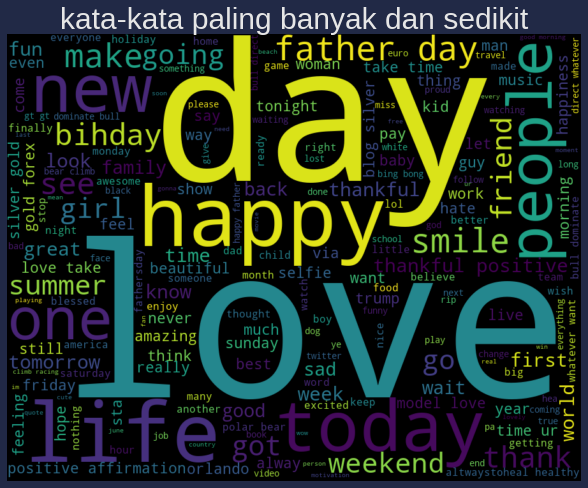

In [ ]:
wordCloud_generator(train["clean_tweet"], title="kata-kata paling banyak dan sedikit")

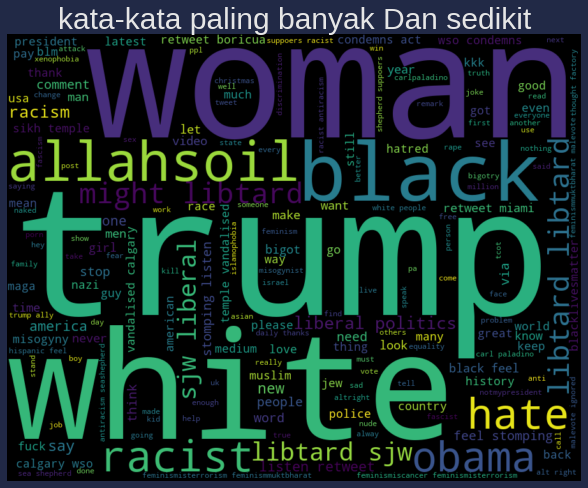

In [ ]:
#rasis
wordCloud_generator(train["clean_tweet"][train.label == 1], title="kata-kata paling banyak Dan sedikit")

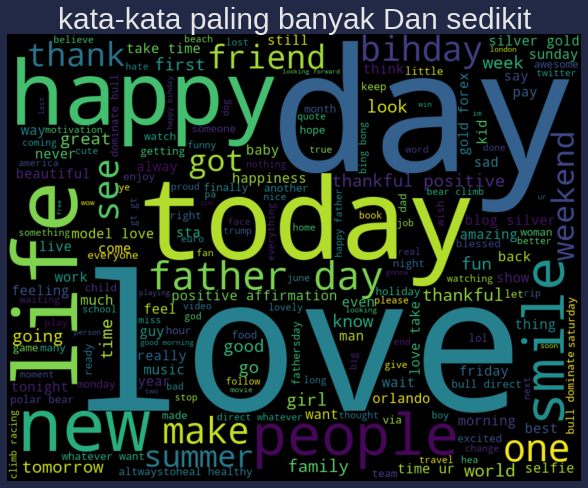

In [ ]:
#non-rasis
wordCloud_generator(train["clean_tweet"][train.label == 0], title="kata-kata paling banyak Dan sedikit")

#Tokenizer

In [ ]:
train_clean = train.clean_tweet
test_clean = test.clean_tweet
target = train.label

In [ ]:
tokenizer = Tokenizer(oov_token="etc")
tokenizer.fit_on_texts(train_clean)
 
train_tweet = tokenizer.texts_to_sequences(train_clean)
 
max_length = max([len(x) for x in train_tweet])
max_len = train_clean.apply(lambda x: len(x)).max()
vocab_size = len(tokenizer.word_index) + 1 + 1
 
print("Vocab size: {}".format(vocab_size))
print("max length of sentence: {}".format(max_length))
print("\nExample:\n")
print("Sentence:\n{}".format(train_clean[1]))
print("\nAfter tokenizing :\n{}".format(train_tweet[1]))
 
train_tweet = pad_sequences(train_tweet, padding='post', maxlen=max_len)
print("\nAfter padding :\n{}".format(train_tweet[1]))

Vocab size: 35084
max length of sentence: 37

Example:

Sentence:
thanks lyft credit cannot use cause offer wheelchair van pdx disapointed getthanked

After tokenizing :
[95, 4951, 2066, 21, 338, 510, 1058, 7001, 3867, 7002, 13604, 8935]

After padding :
[   95  4951  2066    21   338   510  1058  7001  3867  7002 13604  8935
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0   

In [ ]:
#tester
test_tweet = tokenizer.texts_to_sequences(test_clean)
 
max_length = max([len(x) for x in test_tweet])
vocab_size = len(tokenizer.word_index)+ 1 + 1
 
print("Vocabulary size: {}".format(vocab_size))
print("max length of sentence: {}".format(max_length))
print("\nExample:\n")
print("Sentence:\n{}".format(test_clean[1]))
print("\nAfter tokenizing :\n{}".format(test_tweet[1]))
 
test_tweet = pad_sequences(test_tweet, padding='post', maxlen=max_len)
print("\nAfter padding :\n{}".format(test_tweet[1]))

Vocabulary size: 35084
max length of sentence: 20

Example:

Sentence:
white supremacist want everyone see new bird movie

After tokenizing :
[135, 31140, 25, 113, 22, 11, 367, 289]

After padding :
[  135 31140    25   113    22    11   367   289     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


# use modern algorithm deep learning
untuk pemodelan Saya akan mengunakan layers RNN + CNN + ANN untuk meningkatkan accuracy dan juga memakai lstm dua arah,disini saya mengunakan Early Stopping untuk mencegah overfitting

In [ ]:
 
#split 20%
#mengunakan stratify untuk imbalance 
x_train, x_valid, y_train, y_valid = train_test_split(train_tweet,target,test_size=0.2,random_state=2021,stratify=target)
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(25569, 124)
(6393, 124)
(25569,)
(6393,)


In [ ]:
#modeling
embedding_dim = 16
units = 76
 
model = Sequential()
 
#input
model.add(Embedding(vocab_size, embedding_dim, input_length=train_tweet.shape[1]))
 
#RNN layers
model.add(Bidirectional(LSTM(units, dropout = 0.3, recurrent_dropout = 0.3, return_sequences=True))) 
 
#CNN layers
model.add(Conv1D(64, 3, padding = "same", activation = "relu")) 
model.add(MaxPooling1D(2)) 
model.add(Flatten()) 
model.add(Dropout(0.5))
 
#ANN layers
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4)) 
model.add(Dense(64, activation="relu")) 
model.add(Dropout(0.3)) 
 
#output
model.add(Dense(1, activation="sigmoid"))

In [ ]:
 es = EarlyStopping(monitor='val_loss', verbose=1,patience=3,mode='auto')

In [ ]:
ADAM = tf.keras.optimizers.Adam(learning_rate=0.001)
RMS = tf.keras.optimizers.RMSprop(learning_rate=0.001) 
 
model.compile(loss="binary_crossentropy",
              optimizer=ADAM,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 124, 16)           561344    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 124, 152)          56544     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 124, 64)           29248     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3968)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3968)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

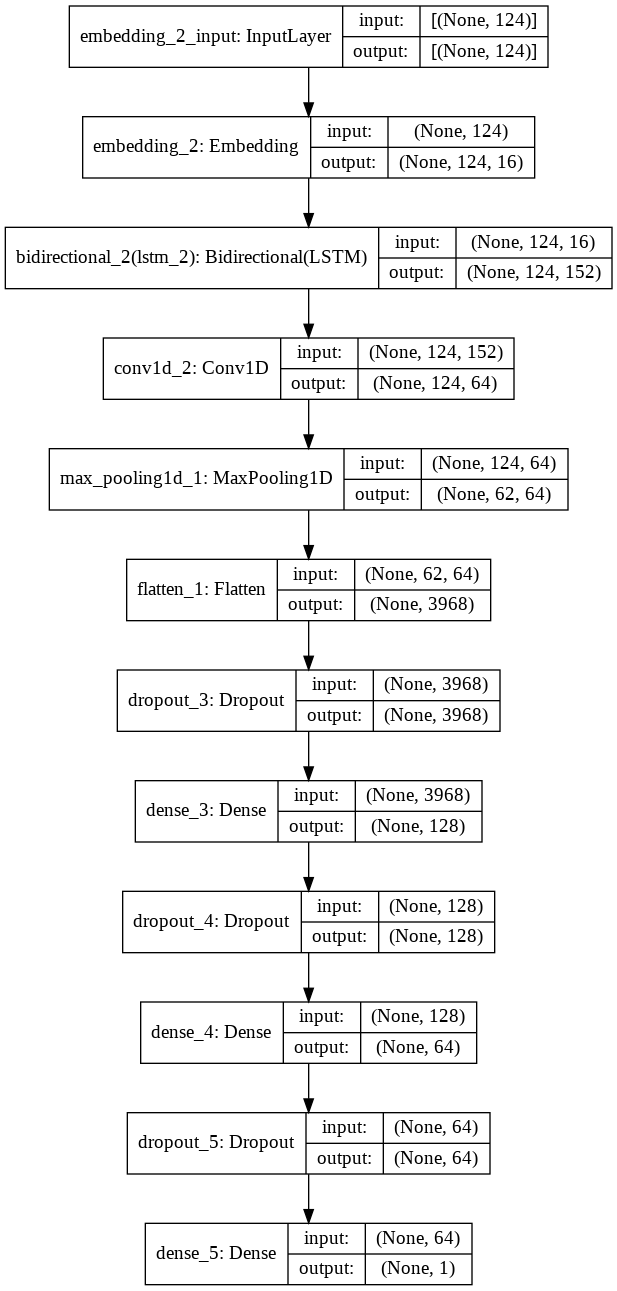

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
epochs = 20 
bc = 128
 
history = model.fit(x_train,y_train,
                    epochs=epochs,
                    validation_data=(x_valid,y_valid),
                    batch_size=bc,verbose=1,
                    callbacks=[es])

Epoch 1/20
200/200 [==============================] - 147s 707ms/step - loss: 0.2311 - accuracy: 0.9315 - val_loss: 0.1350 - val_accuracy: 0.9546
Epoch 2/20
200/200 [==============================] - 140s 703ms/step - loss: 0.0908 - accuracy: 0.9707 - val_loss: 0.1215 - val_accuracy: 0.9587
Epoch 3/20
200/200 [==============================] - 141s 706ms/step - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.1407 - val_accuracy: 0.9560
Epoch 4/20
200/200 [==============================] - 142s 708ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.1789 - val_accuracy: 0.9514
Epoch 5/20
200/200 [==============================] - 142s 708ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.2120 - val_accuracy: 0.9493
Epoch 00005: early stopping


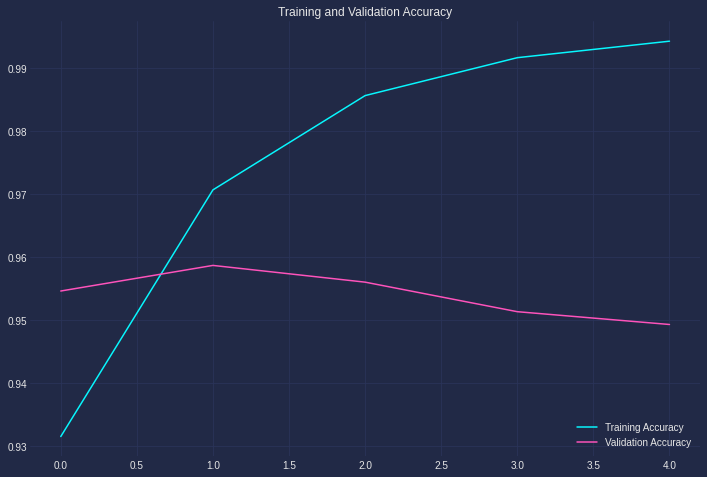

In [ ]:
#accuracy plot
epochs_range = range(5) #pelatihan berhenti di step 5
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
 
 
plt.figure(figsize = (12,8))
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.show()

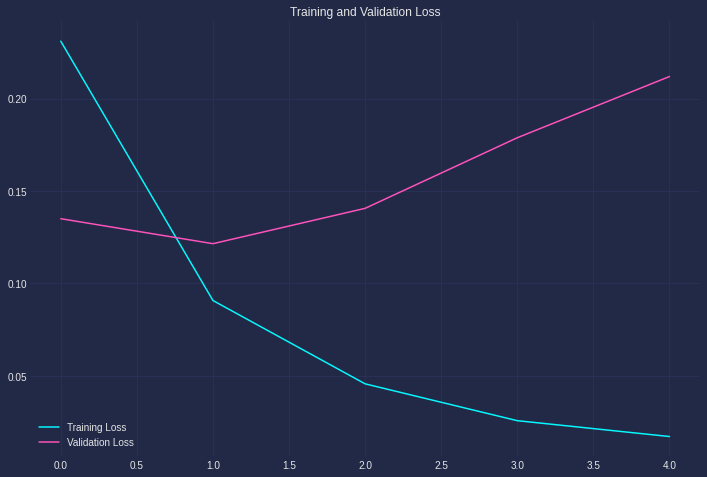

In [ ]:
#accuracy plot
epochs_range = range(5) 
acc = history.history["loss"]
val_acc = history.history["val_loss"]
 
 
plt.figure(figsize = (12,8))
plt.plot(epochs_range, acc, label="Training Loss")
plt.plot(epochs_range, val_acc, label="Validation Loss")
plt.legend(loc="lower left")
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
y_true = model.predict_classes(x_valid)

In [ ]:
classification_report(y_true, y_valid)

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.97      5895\n           1       0.69      0.62      0.66       498\n\n    accuracy                           0.95      6393\n   macro avg       0.83      0.80      0.82      6393\nweighted avg       0.95      0.95      0.95      6393\n'

In [ ]:
f1_score(y_true, y_valid)

0.6575052854122622

In [ ]:
true_predict = model.predict_classes(test_tweet)

In [ ]:
sub["label"] = true_predict

In [ ]:
sub.label.value_counts()

0    16257
1      940
Name: label, dtype: int64

In [ ]:
sub.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [ ]:
sub.to_csv("sesubs.csv",index=False)

#use traditional machine learning

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer, TfidfVectorizer

In [ ]:
train_tweet = train["clean_tweet"]
test_tweet = test["clean_tweet"]
target = train["label"]

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, target, test_size=0.15, random_state=10)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(27167,)
(27167,)


In [ ]:
cv = CountVectorizer(ngram_range=(1, 3), max_features=2000)

In [ ]:
cv_train = cv.fit_transform(x_train)
cv_val = cv.transform(x_val)

In [ ]:
tf = TfidfTransformer()

In [ ]:
cv_train = tf.fit_transform(cv_train)
cv_val = tf.transform(cv_val)

Random forest

In [ ]:
rf = RandomForestClassifier(max_depth=3).fit(cv_train, y_train)

In [ ]:
print(rf.score(cv_train, y_train)) 
print(rf.score(cv_val, y_val))

0.9321603415909008
0.9318039624608968


In [ ]:
y_true_rf = rf.predict(cv_val)

In [ ]:
classification_report(y_true_rf, y_val)

'              precision    recall  f1-score   support\n\n           0       1.00      0.93      0.96      4779\n           1       0.05      1.00      0.09        16\n\n    accuracy                           0.93      4795\n   macro avg       0.52      0.97      0.53      4795\nweighted avg       1.00      0.93      0.96      4795\n'

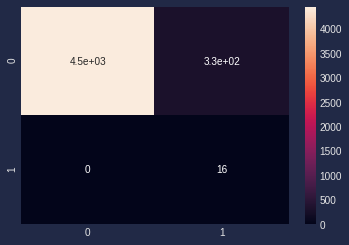

In [ ]:
cf = confusion_matrix(y_true_rf, y_val)
sns.heatmap(cf, annot=True)

Svc

In [ ]:
sv = SVC(C = 1.0,kernel="linear").fit(cv_train, y_train)

In [ ]:
print(sv.score(cv_train, y_train)) 
print(sv.score(cv_val, y_val))

0.955718334744359
0.9528675703858186


In [ ]:
y_true_sv = sv.predict(cv_val)

In [ ]:
classification_report(y_true_sv, y_val)

'              precision    recall  f1-score   support\n\n           0       0.99      0.96      0.98      4626\n           1       0.42      0.85      0.56       169\n\n    accuracy                           0.95      4795\n   macro avg       0.71      0.90      0.77      4795\nweighted avg       0.97      0.95      0.96      4795\n'

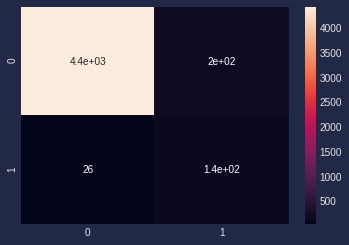

In [ ]:
cf = confusion_matrix(y_true_sv, y_val)
sns.heatmap(cf, annot=True)

MultinomialNB

In [ ]:
ml = MultinomialNB().fit(cv_train, y_train)

In [ ]:
print(ml.score(cv_train, y_train)) 
print(ml.score(cv_val, y_val))

0.9508963080207605
0.9493222106360792


In [ ]:
y_true_ml = ml.predict(cv_val)

In [ ]:
classification_report(y_true_ml, y_val)

'              precision    recall  f1-score   support\n\n           0       1.00      0.95      0.97      4673\n           1       0.32      0.91      0.48       122\n\n    accuracy                           0.95      4795\n   macro avg       0.66      0.93      0.73      4795\nweighted avg       0.98      0.95      0.96      4795\n'

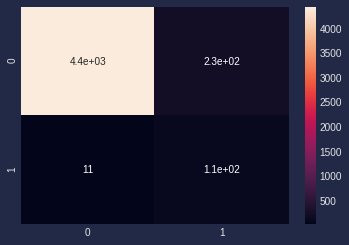

In [ ]:
cf = confusion_matrix(y_true_ml, y_val)
sns.heatmap(cf, annot=True)

 Logisticsregression(hanya percobaan)

In [ ]:
lg = LogisticRegression().fit(cv_train, y_train)

In [ ]:
print(lg.score(cv_train, y_train)) 
print(lg.score(cv_val, y_val))

0.9540619133507564
0.9530761209593326


In [ ]:
y_true_lg = lg.predict(cv_val)

In [ ]:
classification_report(y_true_lg, y_val)

'              precision    recall  f1-score   support\n\n           0       1.00      0.95      0.98      4653\n           1       0.38      0.92      0.54       142\n\n    accuracy                           0.95      4795\n   macro avg       0.69      0.93      0.76      4795\nweighted avg       0.98      0.95      0.96      4795\n'

#KESIMPULAN
 
1.model sangat imbalance, jadi saya akan mengunakan mencoba beberapa algorithm untuk masalah ini nanti
 
2.model ini mendapatkan f1_score 65% dan accuracy_socre 95%  ini bisa jadi gak berguna dgn f1_score yang kecil
 
3.model nya overfitting, tetapi menurut saya ini model bagus
 
 
 
Terima Kasih 
 
Dicoding & Lintarsarta